In [1]:
#Import Libraries
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
#Read the dataset from CSV File
data = pd.read_csv("data.csv" , index_col= 0)
data.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
#Dividing dataset into features and result
#Put Features into X
X = data[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos']]
print(X.shape)
X.head(5)

#Hot Encoding
X_hot = pd.get_dummies(X, columns=['location', 'country','gender', 'age', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos'])
print(X_hot.shape)
print(X_hot.head(5))

(863, 13)
(863, 373)
   vis_wuhan  from_wuhan  ...  diff_sym_hos_14  diff_sym_hos_15
0          1           0  ...                0                0
1          0           1  ...                0                0
2          0           1  ...                0                0
3          1           0  ...                0                0
4          0           0  ...                0                0

[5 rows x 373 columns]


In [4]:
#Labeled Data
Y = data['result']
print(Y.shape)
Y.head()

(863,)


0    1
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [5]:
#splite the data into Train and Test by 84% for training to 16% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X_hot, Y, test_size = .15, random_state = 3, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(733, 373)
(130, 373)
(733,)
(130,)


In [6]:
#normalize the data values
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)

In [7]:
#GrideSearchCV to find the optimal hyperparameters by fit alot of models with difrrent hyperparameters and chose the best one with high accuracy
get_grid_para = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf'], 'probability':[True,False]}
grid_result = GridSearchCV(SVC(random_state=3), get_grid_para, refit = True, verbose = 3, cv= 10, n_jobs= -1, scoring = 'accuracy') 
grid_result.fit(xTrain, yTrain)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=SVC(random_state=3), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf'],
                         'probability': [True, False]},
             scoring='accuracy', verbose=3)

In [8]:
print(grid_result.best_params_, '  ' , grid_result.best_estimator_ , ' The Best Score : ' , grid_result.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}    SVC(C=100, gamma=0.001, probability=True, random_state=3)  The Best Score :  0.9386153276564235


In [9]:
#train the model with optimal hyperparameters
SVM_model = SVC( kernel = 'rbf', C=100 , gamma=0.001 , random_state = 3 , probability=True)
SVM_model.fit(xTrain, yTrain)

SVC(C=100, gamma=0.001, probability=True, random_state=3)

In [10]:
#test the accuracy of model on training set
print('SVM_model Train Score is : ' , SVM_model.score(xTrain, yTrain))

SVM_model Train Score is :  1.0


In [11]:
yPred = SVM_model.predict(xTest)
yPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

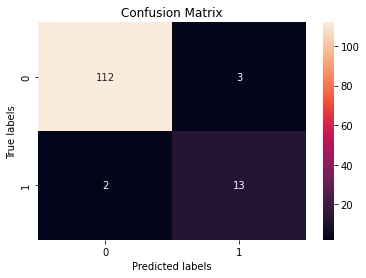

In [12]:
#Calculating Prediction
yPred = SVM_model.predict(xTest)
#print('Predicted Value for SVM_model is : ' , yPred[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [13]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       115
           1       0.81      0.87      0.84        15

    accuracy                           0.96       130
   macro avg       0.90      0.92      0.91       130
weighted avg       0.96      0.96      0.96       130



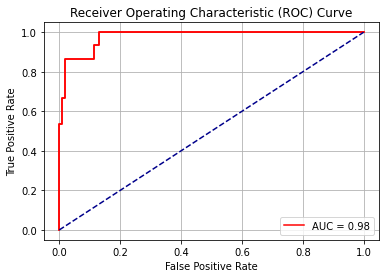

In [14]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, SVM_model.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, SVM_model.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()